# Normality Test and Correlation Visuals
Let's inspect the data for normality using the Shapiro-Walk test. This will determine which correlation method is suitable for our application. 

In [5]:
## import required libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore, shapiro, spearmanr
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [6]:
filename = './main_df.csv'
df = pd.read_csv(filename)

In [7]:
# Shapiro-Wilk Test

df_pm_vehicles_pop = df
df_pm_vehicles_pop['Gas Cars per Capita'] = (
    df_pm_vehicles_pop['Number of Gas Cars'] / df_pm_vehicles_pop['Adult Population']
)
df_pm_vehicles_pop['EV per Capita'] = (
    df_pm_vehicles_pop['Number of EV'] / df_pm_vehicles_pop['Adult Population']
)

columns = ['Adult Population', 'Gas Cars per Capita', 'EV per Capita']

for column in columns:
    df_2019 = df_pm_vehicles_pop[df_pm_vehicles_pop['Data Year'] == 2019]
    df_2023 = df_pm_vehicles_pop[df_pm_vehicles_pop['Data Year'] == 2023]
    
    stat_2019, p_2019 = shapiro(df_2019[column])
    stat_2023, p_2023 = shapiro(df_2023[column])
    
    if p_2019 > 0.05:
        print(f'stat={stat_2019:.3f}, p={p_2019:.3f}: 2019 {column} probably normal')
    else:
        print(f'stat={stat_2019:.3f}, p={p_2019:.3f}: 2019 {column} probably not normal')

    if p_2023 > 0.05:
        print(f'stat={stat_2023:.3f}, p={p_2023:.3f}: 2023 {column} probably normal')
    else:
        print(f'stat={stat_2023:.3f}, p={p_2023:.3f}: 2023 {column} probably not normal')

stat=0.505, p=0.000: 2019 Adult Population probably not normal
stat=0.512, p=0.000: 2023 Adult Population probably not normal
stat=0.888, p=0.001: 2019 Gas Cars per Capita probably not normal
stat=0.883, p=0.001: 2023 Gas Cars per Capita probably not normal
stat=0.878, p=0.000: 2019 EV per Capita probably not normal
stat=0.898, p=0.002: 2023 EV per Capita probably not normal


Since the results came back that none of the datasets have a normal distribution, we'll use the Spearman R correlation coefficient for determining the relationship between our variables

Spearman correlation coefficient: 0.423, p-value: 0.007
Spearman correlation coefficient: -0.443, p-value: 0.004
Spearman correlation coefficient: -0.216, p-value: 0.181
Spearman correlation coefficient: 0.214, p-value: 0.184
Spearman correlation coefficient: -0.246, p-value: 0.126
Spearman correlation coefficient: -0.341, p-value: 0.032


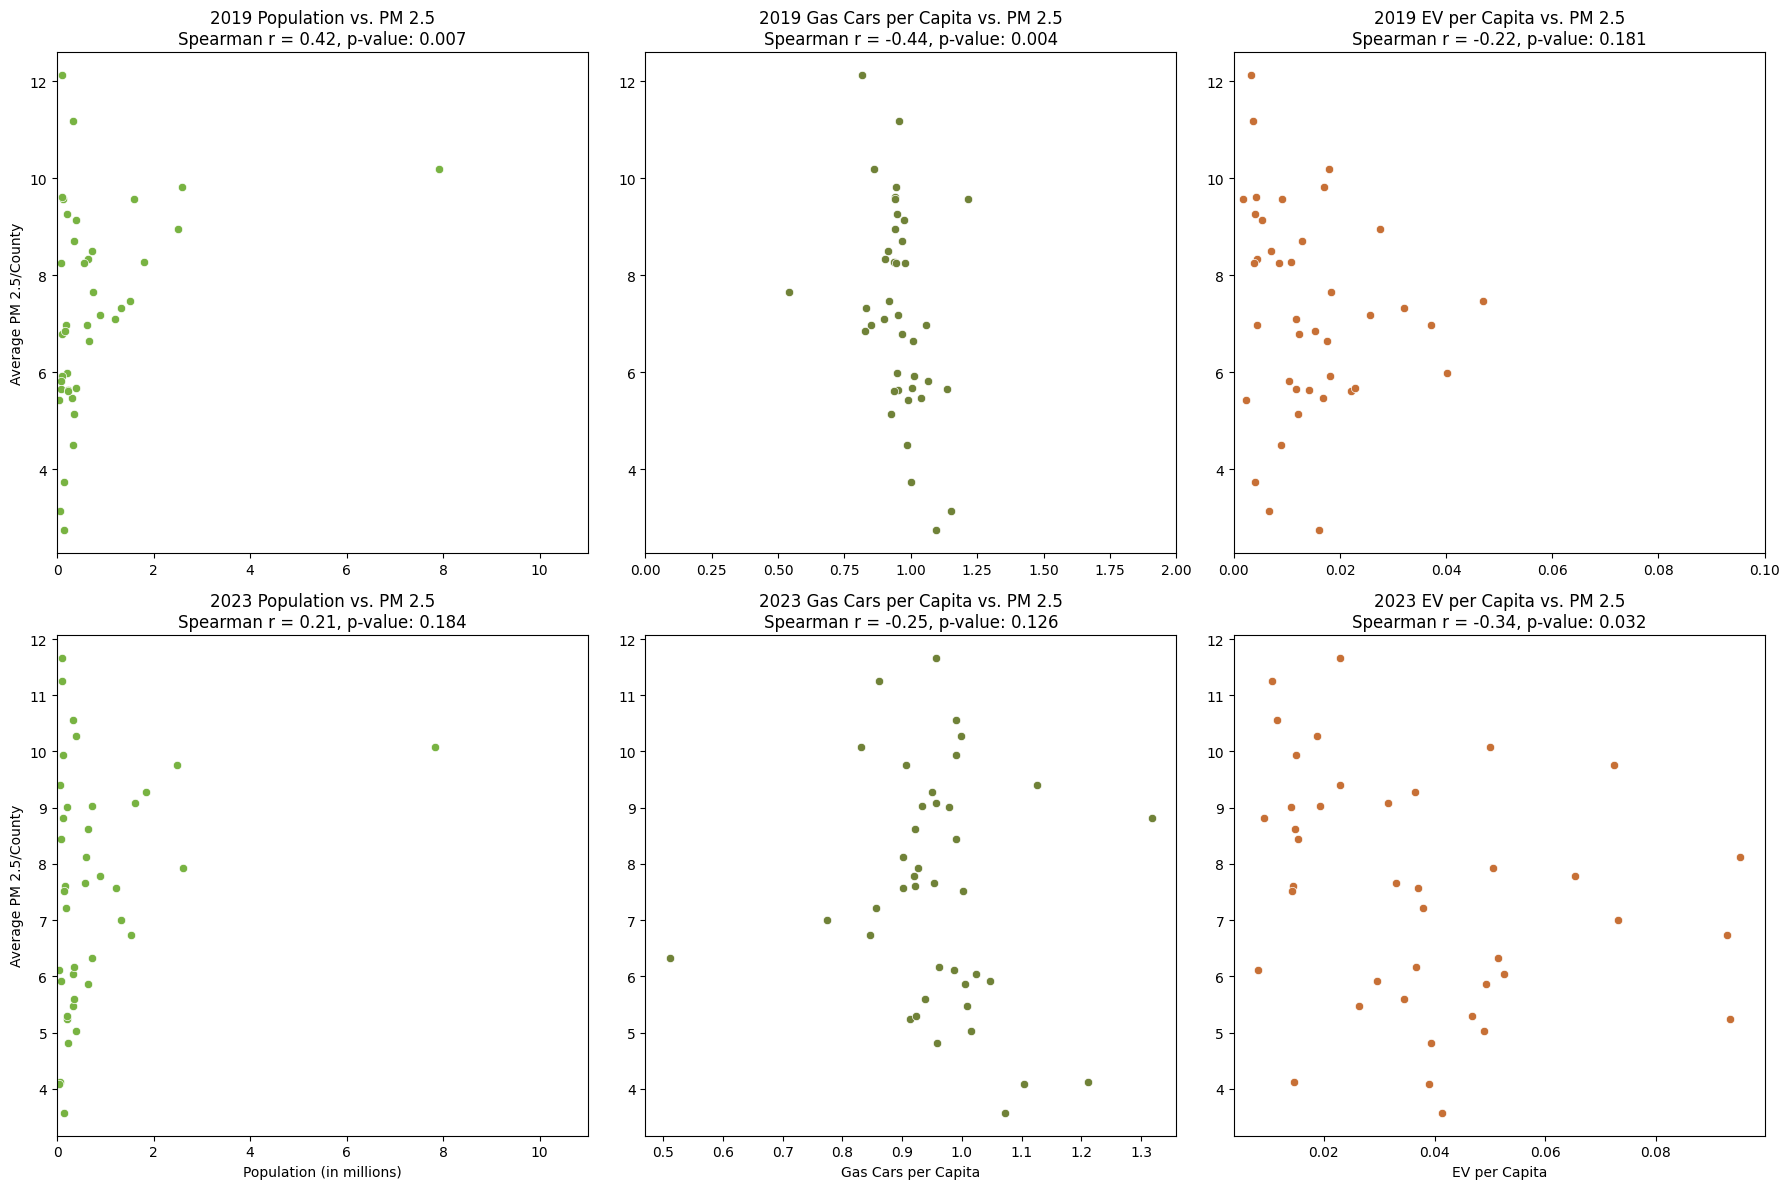

In [8]:
# Filter DataFrames for specific years
df_2023 = df_pm_vehicles_pop[df_pm_vehicles_pop['Data Year'] == 2023]
df_2019 = df_pm_vehicles_pop[df_pm_vehicles_pop['Data Year'] == 2019]

# Convert 'Adult Population' to millions
df_2023.loc[:, ['Population (M)']] = df_2023['Adult Population'] / 1_000_000
df_2019.loc[:, ['Population (M)']] = df_2019['Adult Population'] / 1_000_000

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 2019 Plots
# Calculate Spearman correlation
stat, p = spearmanr(df_2019['Population (M)'], df_2019['Average PM 2.5/County'])
print(f'Spearman correlation coefficient: {stat:.3f}, p-value: {p:.3f}')

# Plot 1 (Row 0, Col 0): Population vs. Average PM 2.5 (2019)
sns.scatterplot(x='Population (M)', y='Average PM 2.5/County', data=df_2019, ax=axes[0, 0], color='#78b342')
axes[0, 0].set_title(f'2019 Population vs. PM 2.5\nSpearman r = {stat:.2f}, p-value: {p:.3f}')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Average PM 2.5/County')
axes[0, 0].set_xlim(0, 11)

# Plot 2 (Row 0, Col 1): Gas Cars per Capita vs. Average PM 2.5 (2019)
stat, p = spearmanr(df_2019['Gas Cars per Capita'], df_2019['Average PM 2.5/County'])
print(f'Spearman correlation coefficient: {stat:.3f}, p-value: {p:.3f}')
sns.scatterplot(x='Gas Cars per Capita', y='Average PM 2.5/County', data=df_2019, ax=axes[0, 1], color='#708238')
axes[0, 1].set_title(f'2019 Gas Cars per Capita vs. PM 2.5\nSpearman r = {stat:.2f}, p-value: {p:.3f}')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlim(0, 2)

# Plot 3 (Row 0, Col 2): EV per Capita vs. Average PM 2.5 (2019)
stat, p = spearmanr(df_2019['EV per Capita'], df_2019['Average PM 2.5/County'])
print(f'Spearman correlation coefficient: {stat:.3f}, p-value: {p:.3f}')
sns.scatterplot(x='EV per Capita', y='Average PM 2.5/County', data=df_2019, ax=axes[0, 2], color='#c77036')
axes[0, 2].set_title(f'2019 EV per Capita vs. PM 2.5\nSpearman r = {stat:.2f}, p-value: {p:.3f}')
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylabel('')
axes[0, 2].set_xlim(0, 0.1)

# 2023 Plots
# Plot 4 (Row 1, Col 0): Population vs. Average PM 2.5 (2023)
stat, p = spearmanr(df_2023['Population (M)'], df_2023['Average PM 2.5/County'])
print(f'Spearman correlation coefficient: {stat:.3f}, p-value: {p:.3f}')
sns.scatterplot(x='Population (M)', y='Average PM 2.5/County', data=df_2023, ax=axes[1, 0], color='#78b342')
axes[1, 0].set_title(f'2023 Population vs. PM 2.5\nSpearman r = {stat:.2f}, p-value: {p:.3f}')
axes[1, 0].set_xlabel('Population (in millions)')
axes[1, 0].set_ylabel('Average PM 2.5/County')
axes[1, 0].set_xlim(0, 11)

# Plot 5 (Row 1, Col 1): Gas Cars per Capita vs. Average PM 2.5 (2023)
stat, p = spearmanr(df_2023['Gas Cars per Capita'], df_2023['Average PM 2.5/County'])
print(f'Spearman correlation coefficient: {stat:.3f}, p-value: {p:.3f}')
sns.scatterplot(x='Gas Cars per Capita', y='Average PM 2.5/County', data=df_2023, ax=axes[1, 1], color='#708238')
axes[1, 1].set_title(f'2023 Gas Cars per Capita vs. PM 2.5\nSpearman r = {stat:.2f}, p-value: {p:.3f}')
axes[1, 1].set_xlabel('Gas Cars per Capita')
axes[1, 1].set_ylabel('')

# Plot 6 (Row 1, Col 2): EV per Capita vs. Average PM 2.5 (2023)
stat, p = spearmanr(df_2023['EV per Capita'], df_2023['Average PM 2.5/County'])
print(f'Spearman correlation coefficient: {stat:.3f}, p-value: {p:.3f}')
sns.scatterplot(x='EV per Capita', y='Average PM 2.5/County', data=df_2023, ax=axes[1, 2], color='#c77036')
axes[1, 2].set_title(f'2023 EV per Capita vs. PM 2.5\nSpearman r = {stat:.2f}, p-value: {p:.3f}')
axes[1, 2].set_xlabel('EV per Capita')
axes[1, 2].set_ylabel('')

# Save and show the plot
plt.savefig("graphic_Correlation.png", dpi=300)

# Adjust layout
plt.tight_layout()
plt.show()

#cell formatted for PEP 8 compliance using chat-gpt 10-7-2024